In [289]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [290]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [291]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect, desc
Base = declarative_base()

In [292]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)
conn = engine.connect()

In [293]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [294]:
session = Session(engine)

In [295]:
engine.execute(text('SELECT * FROM measurement LIMIT 10')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [296]:
engine.execute(text('SELECT * FROM station LIMIT 10')).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [297]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [298]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [299]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [300]:
columns2 = inspector.get_columns('station')
for c in columns2:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [301]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [302]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [303]:
# Find the most recent date in the data set.
newdate = session.query(Measurement.date).order_by(Measurement.date).all()
lastdate = newdate[-1]
lastdate

('2017-08-23',)

In [304]:
#Find last 12 months of dates
last12 = session.query(Measurement.date).filter(Measurement.date > '2016-08-22').all()
last12

[('2016-08-23',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-09-01',),
 ('2016-09-02',),
 ('2016-09-03',),
 ('2016-09-04',),
 ('2016-09-05',),
 ('2016-09-06',),
 ('2016-09-07',),
 ('2016-09-08',),
 ('2016-09-09',),
 ('2016-09-10',),
 ('2016-09-11',),
 ('2016-09-12',),
 ('2016-09-13',),
 ('2016-09-14',),
 ('2016-09-15',),
 ('2016-09-16',),
 ('2016-09-17',),
 ('2016-09-18',),
 ('2016-09-19',),
 ('2016-09-20',),
 ('2016-09-21',),
 ('2016-09-22',),
 ('2016-09-23',),
 ('2016-09-24',),
 ('2016-09-25',),
 ('2016-09-26',),
 ('2016-09-27',),
 ('2016-09-28',),
 ('2016-09-29',),
 ('2016-09-30',),
 ('2016-10-01',),
 ('2016-10-02',),
 ('2016-10-03',),
 ('2016-10-04',),
 ('2016-10-05',),
 ('2016-10-06',),
 ('2016-10-07',),
 ('2016-10-08',),
 ('2016-10-09',),
 ('2016-10-10',),
 ('2016-10-11',),
 ('2016-10-12',),
 ('2016-10-13',),
 ('2016-10-14',),
 ('2016-10-15',),
 ('2016-10-16',),
 ('2016-10

In [305]:
#The date from 12 months ago
lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)
lastyear

datetime.date(2016, 8, 23)

In [306]:
#Query to find the precipitation data from last 12 months, save as a list.
sel = [Measurement.date, Measurement.prcp]

precip = session.query(*sel).\
    filter(Measurement.date > '2016-08-22').all()

precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [307]:
#Save the above list as a dataframe
precipitation_df = pd.DataFrame(precip, columns=['Date','Precipitation'])
precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


([<matplotlib.axis.XTick at 0x7f9102ef70a0>,
 [Text(0.0, 0, '2016-08-23'),
  Text(78.0, 0, '2016-11-09'),
  Text(158.0, 0, '2017-01-28'),
  Text(238.0, 0, '2017-04-18'),
  Text(319.0, 0, '2017-07-10')])

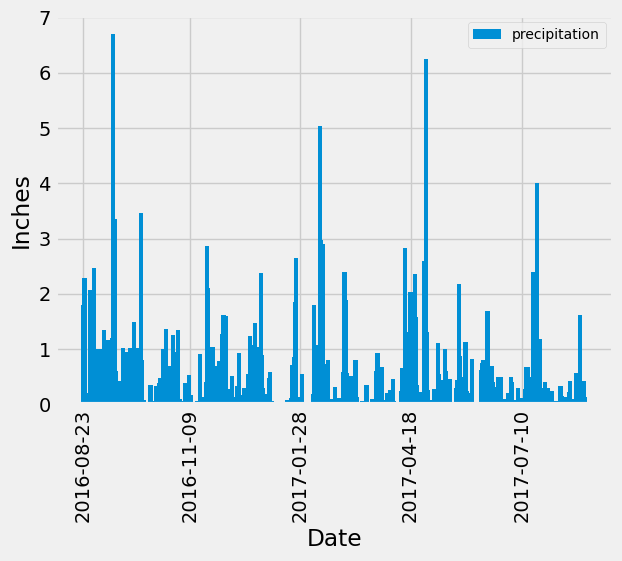

In [320]:
#Plot the precipitation data for the last 12 months using Matplotlib

plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], width=3, label="precipitation")
plt.legend(loc="upper right", fontsize = 10)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(['2016-08-23', '2016-11-09','2017-01-28','2017-04-18','2017-07-10'], rotation=90)

In [321]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_stats = precipitation_df['Precipitation'].describe()
precip_stats_df = pd.DataFrame(precip_stats)
precip_stats_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [310]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [326]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationcounts = session.query(Measurement.station,
    func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(text('count DESC')).all()
stationcounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [331]:
#Creating a dataframe

stationscount = pd.DataFrame(stationcounts)
stations = stationscount.drop(['count'], axis=1)
stations

,station
0,USC00519281
1,USC00519397
2,USC00513117
3,USC00519523
4,USC00516128
5,USC00514830
6,USC00511918
7,USC00517948
8,USC00518838


In [312]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
    

[('USC00519281', 71.66378066378067, 54.0, 85.0)]

In [313]:
#Query for the last 12 months of temperature data from the most active station

sel3 = [Measurement.station, Measurement.date, Measurement.tobs]

temp = session.query(*sel3).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-22').all()

temp

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [314]:
#Take the above data, turn it into a dataframe, and make a frequency data table to plot below.
temp_df = pd.DataFrame(temp, columns = ['Station', 'Date', 'Temperature'])
temp_df

temp_freq = temp_df.groupby(temp_df['Temperature']).count()
temp_freq_df = temp_freq.reset_index()
temp_freq_df



,Temperature,Station,Date
0,59.0,3,3
1,60.0,2,2
2,61.0,1,1
3,62.0,6,6
4,63.0,4,4
5,64.0,3,3
6,65.0,7,7
7,66.0,5,5
8,67.0,15,15
9,68.0,12,12


Text(0, 0.5, 'Frequency')

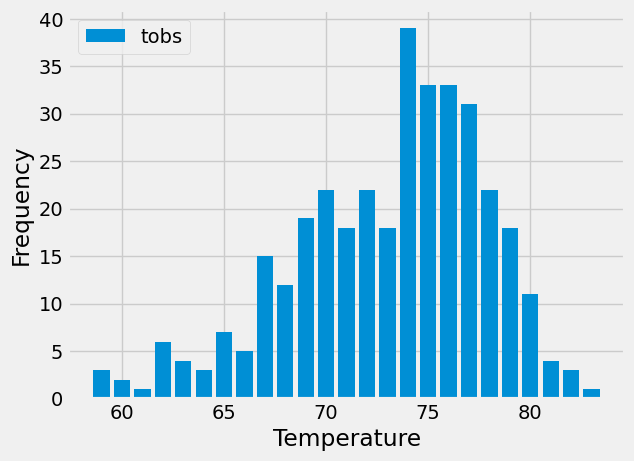

In [315]:
#Plot the results from above

plt.bar(temp_freq_df['Temperature'], temp_freq_df['Date'], label='tobs')
plt.legend(loc='upper left')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [324]:
precipitation_df2 = precipitation_df.set_index('Date')

In [316]:
from flask import Flask, jsonify

In [317]:
#Flask setup

app = Flask(__name__)

In [346]:
#Flask routes

@app.route("/api/v1.0/precipitationj")
def precipitationj():
    """Return the precipitation data as a json"""

    return jsonify(precipitation_df2)

AssertionError: View function mapping is overwriting an existing endpoint function: precipitationj

In [332]:
#Flask Routes continued

@app.route("/api/v1.0/stationsj")
def stationsj():
    """Return the stations list as a json"""

    return jsonify(stations)

In [348]:
#Query the dates and temperature of the most active station from the previous year

sel4 = [Measurement.station, Measurement.tobs, Measurement.date]

tobs = session.query(*sel4).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-22').all()
tobs



[('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC00519281', 75.0, '2016-09-14'),
 ('USC00519281', 79.0, '2016-09-15'),
 ('USC00519281', 78.0, '2016-09-16'),
 ('USC00519281', 79.0, '2016-09-17'),
 ('USC005192

In [350]:
#Take the above into a dataframe

temp_year = pd.DataFrame(tobs, columns=['Station','Temperature','Date'])
temp_year_df = temp_year.drop(['Station'], axis=1)
temp_year_df

,Temperature,Date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


In [351]:
#Create a Json list continued
@app.route("/api/v1.0/tempyear")
def tempyear():
    """Return the temperature and date list as a json list"""

    return jsonify(temp_year_df)

In [367]:
#Create a Json list continued
@app.route("/api/v1.0/tempminmax")
def tempminmax():
    """Return the temperature min, max, and average as a json list"""

    return jsonify(temp_year_df['Temperature'].avg(), temp_year_df['Temperature'].min(), temp_year_df['Temperature'].max())

In [319]:
# Close Session
session.close()